In [ ]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:
# Load the data
data = pd.read_csv('sample_data/data_model.csv', encoding='ISO-8859-1')
# Map actual labels to class labels
class_mapping = {'d': 0, 'l': 1, 'w': 2}
data['RESULTS'] = data['RESULTS'].map(class_mapping)
# Preprocess the data
features = data[['W', 'D', 'L']]
target = data['RESULTS']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=52)

# Define the XGBoost model
model = xgb.XGBClassifier(objective='count:poisson', num_class=3)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



In [ ]:
# Accept input for new match data
new_match = pd.DataFrame({'W': [ 2.38], 'D':  [3.66], 'L': [2.58]})

# Use the trained model to predict the outcome for the new match
new_prediction = model.predict(new_match)

# Map the predicted outcome back to the actual labels
predicted_outcome = [k for k, v in class_mapping.items() if v == new_prediction][0]

# Print the predicted outcome
print("Predicted Outcome:", predicted_outcome)








Predicted Outcome: d


In [ ]:

# Initialize a list to store the outcomes
outcomes = []

# Loop for 10 matches
for i in range(1):
    # Accept input for new match data
    w = float(input("Enter the value for W: "))
    d = float(input("Enter the value for D: "))
    l = float(input("Enter the value for L: "))

    # Create a DataFrame for the new match data
    new_match = pd.DataFrame({'W': [w], 'D': [d], 'L': [l]})

    # Use the trained model to predict the outcome for the new match
    new_prediction = model.predict(new_match)

    # Map the predicted outcome back to the actual labels
    predicted_outcome = [k for k, v in class_mapping.items() if v == new_prediction]

    # Check if the predicted outcome is found in the class_mapping
    if len(predicted_outcome) > 0:
        outcome = predicted_outcome[0]
    else:
        outcome = "Unknown"

    # Append the predicted outcome to the outcomes list
    outcomes.append(outcome)

# Print the outcomes for all 10 matches
print("Predicted Outcomes:")
for i, outcome in enumerate(outcomes):
    print(f"Match {i+1}: {outcome}")


In [ ]:

# Visualize the distribution of outcomes
outcome_counts = data['RESULTS'].value_counts()
plt.figure(figsize=(8, 8))
plt.bar(outcome_counts.index, outcome_counts.values)
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Visualize the betting odds for each outcome
outcomes = data['RESULTS'].unique()
for outcome in outcomes:
    subset = data[data['RESULTS'] == outcome]
    plt.figure(figsize=(10, 10))

    # Plotting distribution curves
    sns.kdeplot(subset['W'], label='Win Odds')
    sns.kdeplot(subset['D'], label='Draw Odds')
    sns.kdeplot(subset['L'], label='Lose Odds')

    plt.title(f'Betting Odds Distribution for {outcome} (with Distribution Curves)')
    plt.xlabel('Betting Odds')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


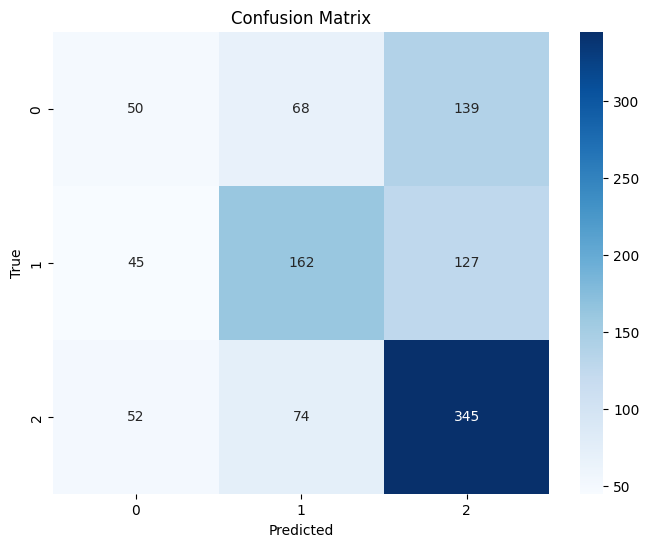

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.19      0.25       257
           1       0.53      0.49      0.51       334
           2       0.56      0.73      0.64       471

    accuracy                           0.52      1062
   macro avg       0.48      0.47      0.46      1062
weighted avg       0.50      0.52      0.50      1062



In [ ]:


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)
